In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Short-term bond ETF (SHY) data:
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2020-01-02  84.669998  84.709999  84.639999  84.669998  80.138115  2665200
2020-01-03  84.720001  84.760002  84.690002  84.739998  80.204361  2039900
2020-01-06  84.730003  84.739998  84.680000  84.709999  80.175972  1132100
2020-01-07  84.720001  84.730003  84.699997  84.709999  80.175972  1103400
2020-01-08  84.720001  84.739998  84.660004  84.669998  80.138115  1864300

Long-term bond ETF (TLT) data:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02  136.789993  137.529999  136.669998  137.009995  125.534485   
2020-01-03  138.270004  139.160004  137.880005  139

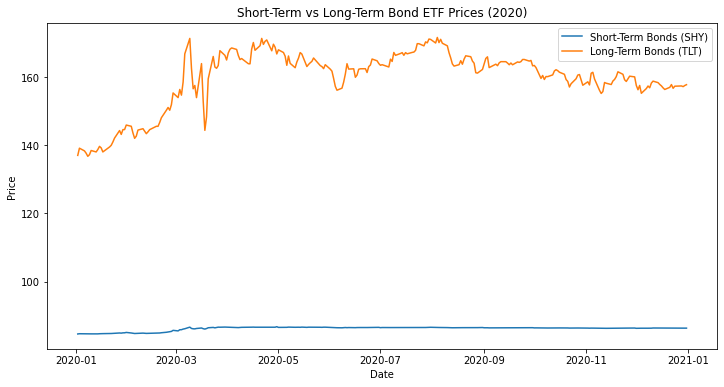


Short-term bond ETF (SHY) statistics:
count    253.000000
mean      86.239447
std        0.599276
min       84.669998
25%       86.360001
50%       86.489998
75%       86.570000
max       86.800003
Name: Close, dtype: float64

Long-term bond ETF (TLT) statistics:
count    253.000000
mean     159.638695
std        8.471808
min      136.740005
25%      157.229996
50%      162.259995
75%      165.119995
max      171.570007
Name: Close, dtype: float64


In [2]:

# Step 2: Define a function to fetch bond data
def fetch_bond_data(short_term_ticker, long_term_ticker, start_date, end_date):
    """
    Fetches historical data for short-term and long-term bond ETFs.

    :param short_term_ticker: Ticker symbol for the short-term bond ETF.
    :param long_term_ticker: Ticker symbol for the long-term bond ETF.
    :param start_date: Start date for the data (format: 'YYYY-MM-DD').
    :param end_date: End date for the data (format: 'YYYY-MM-DD').
    :return: A tuple of DataFrames for short-term and long-term bond ETFs.
    """
    short_term_bonds = yf.download(short_term_ticker, start=start_date, end=end_date)
    long_term_bonds = yf.download(long_term_ticker, start=start_date, end=end_date)
    return short_term_bonds, long_term_bonds

# Step 3: Fetch data
# Example: Fetch data for 2020
short_term_bonds, long_term_bonds = fetch_bond_data('SHY', 'TLT', '2020-01-01', '2021-01-01')

# Step 4: Basic Data Exploration
# Print the first few rows of the data
print("Short-term bond ETF (SHY) data:")
print(short_term_bonds.head())

print("\nLong-term bond ETF (TLT) data:")
print(long_term_bonds.head())

# Step 5: Plotting the data
# Plot the closing prices of both ETFs
plt.figure(figsize=(12, 6))
plt.plot(short_term_bonds['Close'], label='Short-Term Bonds (SHY)')
plt.plot(long_term_bonds['Close'], label='Long-Term Bonds (TLT)')
plt.title('Short-Term vs Long-Term Bond ETF Prices (2020)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Step 6: Basic Statistics
# Calculate and display basic statistics like mean, median, standard deviation
print("\nShort-term bond ETF (SHY) statistics:")
print(short_term_bonds['Close'].describe())

print("\nLong-term bond ETF (TLT) statistics:")
print(long_term_bonds['Close'].describe())


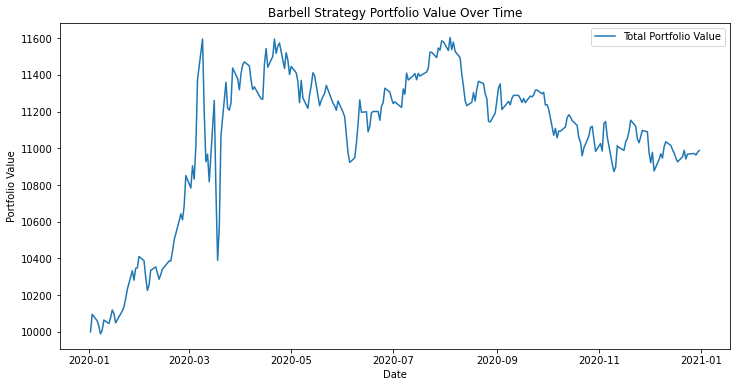

In [3]:
# Step 4: Portfolio Allocation
# Define the allocation percentage for short-term and long-term bonds
p=0.4
allocation_short_term = p  # 50% allocation to short-term bonds
allocation_long_term = 1 - allocation_short_term  # Remaining allocation to long-term bonds

# Step 5: Calculate Portfolio Value Over Time
def calculate_portfolio_value(bonds, allocation, initial_investment):
    """
    Calculates the portfolio value over time for given bonds.

    :param bonds: DataFrame with bond ETF data.
    :param allocation: Allocation percentage for these bonds.
    :param initial_investment: Total initial investment amount.
    :return: Series representing the portfolio value over time.
    """
    investment_amount = initial_investment * allocation
    units_purchased = investment_amount / bonds['Close'].iloc[0]
    portfolio_value = units_purchased * bonds['Close']
    return portfolio_value

# Initial investment amount
initial_investment = 10000  # Example amount

# Calculate portfolio values
short_term_value = calculate_portfolio_value(short_term_bonds, allocation_short_term, initial_investment)
long_term_value = calculate_portfolio_value(long_term_bonds, allocation_long_term, initial_investment)

# Total portfolio value
total_portfolio_value = short_term_value + long_term_value

# Step 6: Plotting Portfolio Value
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(total_portfolio_value, label='Total Portfolio Value')
plt.title('Barbell Strategy Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

In [8]:
def calculate_performance_metrics(bond_data):
    """
    Calculates performance metrics for a given bond or ETF.

    :param bond_data: DataFrame with bond ETF data.
    :return: Dictionary containing performance metrics.
    """
    # Total Return
    total_return = (bond_data['Close'].iloc[-1] - bond_data['Close'].iloc[0]) / bond_data['Close'].iloc[0]

    # Annualized Volatility
    daily_returns = bond_data['Close'].pct_change()
    volatility = daily_returns.std() * np.sqrt(252)  # Annualizing the standard deviation

    # Approximate Yield (for ETFs)
    # Note: This is a simplification. Actual bond yields would require more complex calculations.
    yield_approx = bond_data['Close'].mean() / bond_data['Close'].iloc[0]

    return {f"total_return: {total_return: .3f},volatility: {volatility:.3f},yield_approx: {yield_approx:.3f}"}

# Calculate metrics for both ETFs
short_term_metrics = calculate_performance_metrics(short_term_bonds)
long_term_metrics = calculate_performance_metrics(long_term_bonds)

print("Short-Term Bond Metrics:", short_term_metrics)
print("Long-Term Bond Metrics:", long_term_metrics)


Short-Term Bond Metrics: {'total_return:  0.020,volatility: 0.013,yield_approx: 1.019'}
Long-Term Bond Metrics: {'total_return:  0.151,volatility: 0.216,yield_approx: 1.165'}


In [9]:
def basic_risk_assessment(bond_data):
    """
    Performs a basic risk assessment for a bond or ETF.

    :param bond_data: DataFrame with bond ETF data.
    :return: Dictionary containing risk assessment metrics.
    """
    # Interest Rate Risk (approximated by bond duration)
    # Note: For ETFs, this is a simplification. Actual bond duration calculations are more complex.
    interest_rate_risk = bond_data['Close'].std()

    return {f"interest_rate_risk': {interest_rate_risk:.3f}"}

# Perform risk assessment for both ETFs
short_term_risks = basic_risk_assessment(short_term_bonds)
long_term_risks = basic_risk_assessment(long_term_bonds)

print("Short-Term Bond Risks:", short_term_risks)
print("Long-Term Bond Risks:", long_term_risks)


Short-Term Bond Risks: {"interest_rate_risk': 0.599"}
Long-Term Bond Risks: {"interest_rate_risk': 8.472"}
